In [2]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans 
from warnings import filterwarnings

In [6]:
data=pd.read_csv("Country.csv")

In [7]:
df=data.copy()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


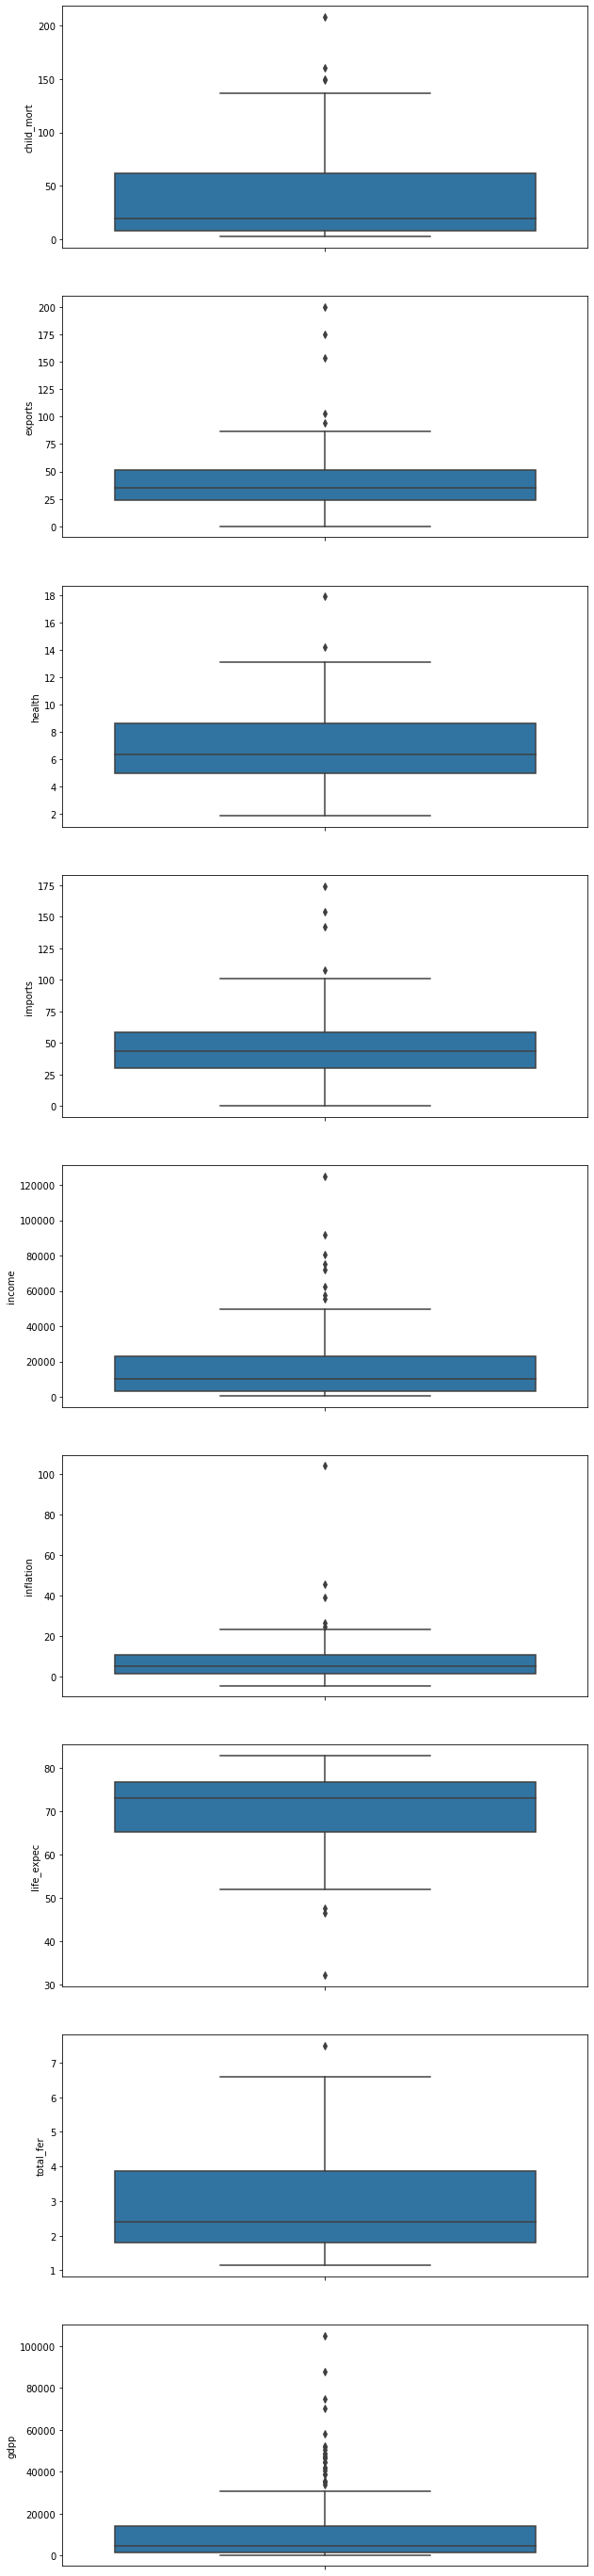

In [16]:
columns_name=df.drop("country", axis=1).columns
fig , axes = plt.subplots(nrows=len(columns_name), figsize=(10, 50))
for i in range(len(columns_name)):
    
    sns.boxplot(ax=axes[i], y=columns_name[i], data=df)

In [17]:
def outlier_r(datacolumn):
    sorted(datacolumn)
    Q1,Q3=np.percentile(datacolumn, [25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [18]:
for col in df.drop('country', axis=1).columns:
    lowerbound, upperbound=outlier_r(df[col])
    df[col]=np.clip(df[col], a_min=lowerbound, a_max=upperbound)

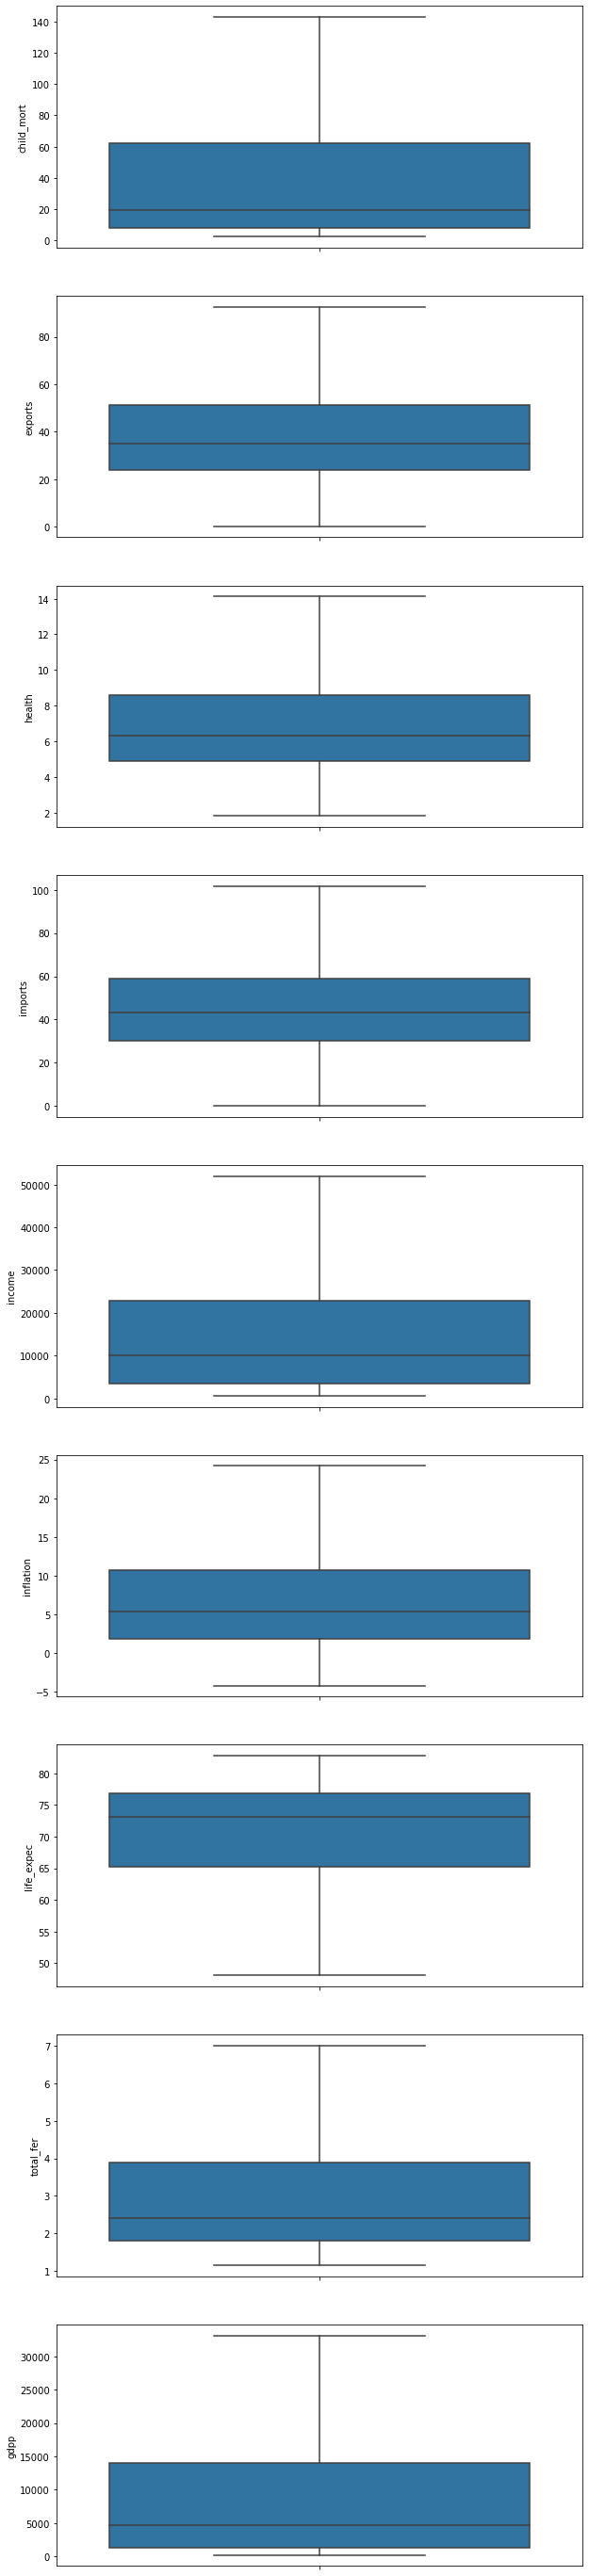

In [19]:
columns_name=df.drop("country", axis=1).columns
fig , axes = plt.subplots(nrows=len(columns_name), figsize=(10, 50))
for i in range(len(columns_name)):
    
    sns.boxplot(ax=axes[i], y=columns_name[i], data=df)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,37.698204,38.443293,2.6000,8.250,19.30,62.10,142.8750
exports,167.0,39.543557,21.301318,0.1090,23.800,35.00,51.35,92.6750
health,167.0,6.792575,2.668103,1.8100,4.920,6.32,8.60,14.1200
imports,167.0,45.862071,20.338815,0.0659,30.200,43.30,58.75,101.5750
income,167.0,15921.574850,15207.197459,609.0000,3355.000,9960.00,22800.00,51967.5000
inflation,167.0,7.065066,6.704968,-4.2100,1.810,5.39,10.75,24.1600
life_expec,167.0,70.663772,8.522535,48.0500,65.300,73.10,76.80,82.8000
total_fer,167.0,2.945075,1.505564,1.1500,1.795,2.41,3.88,7.0075
gdpp,167.0,10351.281437,11612.044330,231.0000,1330.000,4660.00,14050.00,33130.0000


<AxesSubplot:>

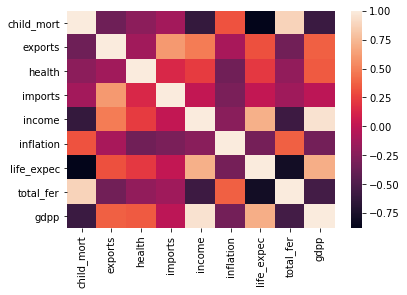

In [21]:
sns.heatmap(df.corr())

In [23]:
cat_c=[]
for col in df.drop('country', axis=1).columns:
    print(col,":", df[col].value_counts().count())
    if df[col].value_counts().count()<20:
        cat_c.append(col)
    
cat_c

child_mort : 136
exports : 143
health : 146
imports : 148
income : 149
inflation : 152
life_expec : 125
total_fer : 138
gdpp : 133


[]

In [24]:
df_country=df["country"]

In [25]:
df.set_index('country', inplace=True)

In [26]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200


In [27]:
df_2=df

In [28]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler().fit(df)
df_scaled=rc.transform(df)
df_scaled

array([[ 1.31662024, -0.90744102,  0.3423913 , ..., -1.46956522,
         1.63549161, -0.32287736],
       [-0.05013928, -0.25408348,  0.0625    , ...,  0.27826087,
        -0.36450839, -0.04481132],
       [ 0.14856082,  0.12341198, -0.58423913, ...,  0.29565217,
         0.23021583, -0.01572327],
       ...,
       [ 0.07428041,  1.3430127 ,  0.14130435, ...,  0.        ,
        -0.2206235 , -0.26336478],
       [ 0.68709378, -0.1814882 , -0.30978261, ..., -0.48695652,
         1.08393285, -0.26336478],
       [ 1.18477252,  0.07259528, -0.11684783, ..., -1.83478261,
         1.43405276, -0.25157233]])

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca=PCA(n_components=2)
df_scaled_pca=pca.fit_transform(df_scaled)
df_scaled_pca

array([[-2.35599001, -0.37005504],
       [ 0.14671397, -0.11321079],
       [-0.38546281, -0.28423578],
       [-2.31319715,  0.84034394],
       [ 0.87898283,  0.42385543],
       [-0.03683209, -1.49175073],
       [-0.32091104, -0.21533087],
       [ 2.230989  , -1.72953507],
       [ 2.76496725, -0.45864778],
       [-0.20169606, -0.19021746],
       [ 1.48484352, -0.50347604],
       [ 1.68101384,  0.56159607],
       [-1.07500622, -0.73038078],
       [ 0.99924594, -0.09543189],
       [ 0.22558541,  0.75926061],
       [ 2.8902538 ,  0.79801972],
       [ 0.05323451,  0.97629377],
       [-2.05954631, -0.01201804],
       [-0.35993173,  0.92309428],
       [-0.77574909,  0.02615376],
       [ 0.59225569, -0.24258019],
       [-0.70923692,  0.35544659],
       [ 0.15686462, -1.68448034],
       [ 2.09932628, -0.27393831],
       [ 0.64390913,  0.48305449],
       [-2.42518368, -0.45430947],
       [-2.35906241, -0.78334508],
       [-0.65345645,  1.0351861 ],
       [-2.13716277,

In [31]:
km_model=KMeans(n_clusters=3, random_state=42).fit(df_scaled_pca)
km_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [33]:
km_model.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1])

In [35]:
km_model.cluster_centers_

array([[ 0.13210913,  0.25673052],
       [-1.83282542, -0.15602411],
       [ 2.35046875, -0.31078303]])

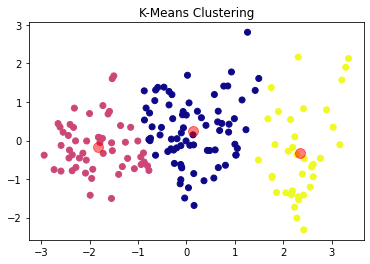

In [37]:
plt.scatter(df_scaled_pca[:,0], df_scaled_pca[:,1], c=km_model.labels_, cmap="plasma")
centers=km_model.cluster_centers_
plt.scatter(centers[:, 0],centers[:, 1], c="red", s=100, alpha=0.5)
plt.title("K-Means Clustering");

In [38]:
df_kmeans=df.copy()
df_kmeans["Development_Status"]=km_model.labels_
df_kmeans.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Development_Status
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,0


In [41]:
df_kmeans.reset_index(inplace=True)
df_kmeans.groupby(["Development_Status", "country"]).agg({"country":"size"})

country
Development_Status country                      
0                  Albania                     1
                   Algeria                     1
                   Antigua and Barbuda         1
                   Argentina                   1
                   Armenia                     1
...                                          ...
2                  Sweden                      1
                   Switzerland                 1
                   United Arab Emirates        1
                   United Kingdom              1
                   United States               1

[167 rows x 1 columns]

In [42]:
df_kmeans.groupby("Development_Status")[["country"]].agg({"country":"size"})

,country
Development_Status,
0,77
1,53
2,37


In [45]:
replace_values={0:'Developing', 1: 'Under-Developed', 2: 'Developed'}
final_df_kmeans=df_kmeans.replace({'Development_Status': replace_values})
final_df_kmeans.head()

,level_0,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Development_Status
0,0,0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,Under-Developed
1,1,1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,Developing
2,2,2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,Developing
3,3,3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,Under-Developed
4,4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,Developing


In [46]:
final_df_kmeans.Development_Status.value_counts()

Developing         77
Under-Developed    53
Developed          37
Name: Development_Status, dtype: int64

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(df_scaled_pca)

Text(0.5, 1.0, 'Hierarchial Clustering')

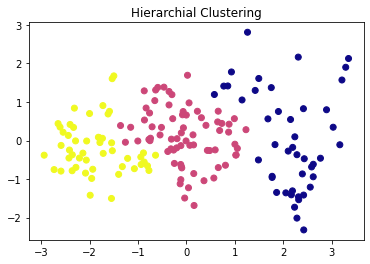

In [50]:
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1], c=y_hc, cmap="plasma" )
plt.title("Hierarchial Clustering")

In [52]:
df_hier=df.copy()
df_hier["Development_Status"]=y_hc
df_hier.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Development_Status
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,1


In [53]:
df_hier.reset_index(inplace=True)

In [54]:
df_hier.groupby(["Development_Status", "country"]).agg({"country":"size"})

country
Development_Status country            
0                  Australia         1
                   Austria           1
                   Bahamas           1
                   Bahrain           1
                   Belgium           1
...                                ...
2                  Togo              1
                   Uganda            1
                   Uzbekistan        1
                   Yemen             1
                   Zambia            1

[167 rows x 1 columns]

In [55]:
df_hier.Development_Status.value_counts()

1    72
2    50
0    45
Name: Development_Status, dtype: int64

In [57]:
replace_values={0:'Developed', 1: 'Developing', 2: 'Under-Developed'}
final_df_hier=df_hier.replace({'Development_Status': replace_values})
final_df_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Development_Status
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,Under-Developed
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,Under-Developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,Developing
